In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from kuramoto import Kuramoto

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

### Instantiate a random graph and transform into an adjacency matrix

In [2]:
graph_nx = nx.erdos_renyi_graph(n=100, p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)

### Instantiate model with parameters

In [3]:
model = Kuramoto(coupling=3, dt=0.01, T=10, n_nodes=len(graph))                 

### Run simulation - output is time series for all nodes (node vs time)

In [4]:
act_mat = model.run(adj_mat=graph)
print(act_mat.shape)

(100, 1000)


### Plot all the time series

Text(0, 0.5, '$\\sin(\\theta)$')

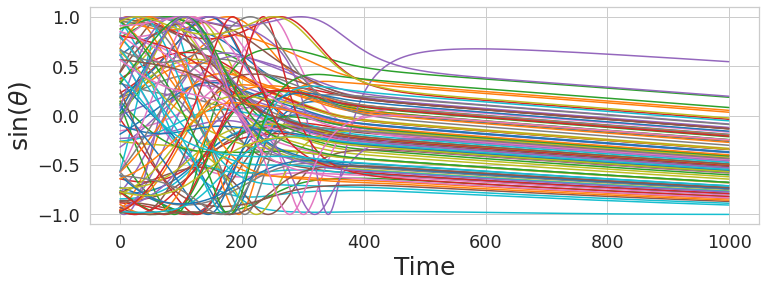

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(np.sin(act_mat.T))
plt.xlabel('Time', fontsize=25)
plt.ylabel(r'$\sin(\theta)$', fontsize=25)

### Plot evolution of order global order parameter $R_t$

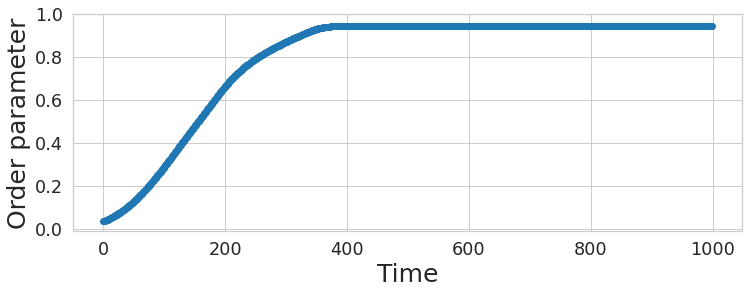

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(
    [Kuramoto.phase_coherence(vec)
     for vec in act_mat.T],
    'o'
)
plt.ylabel('Order parameter', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.ylim((-0.01, 1));

### Plot oscillators in complex plane at times $t = 0, 250, 500$

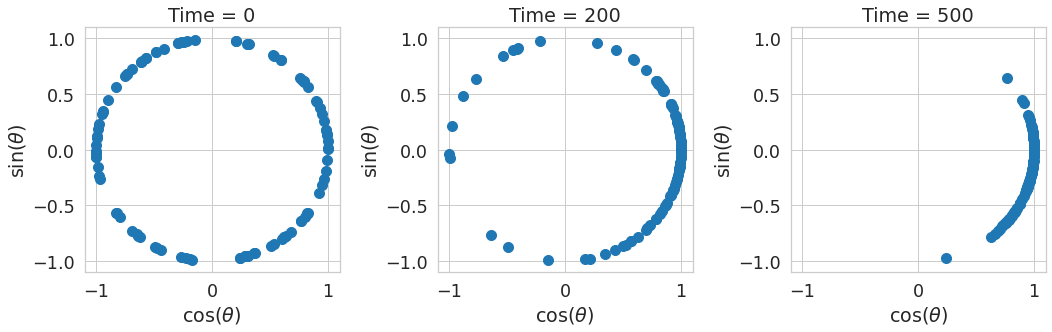

In [7]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',                             
                         })

times = [0, 200, 500]
for ax, time in zip(axes, times):
    ax.plot(np.cos(act_mat[:, time]), 
            np.sin(act_mat[:, time]), 
            'o', 
            markersize=10)
    ax.set_title(f'Time = {time}')
plt.tight_layout()